SLR:
  x = y  

MLR
x1,x2, x3,....,xn = y
Multiple linear regression is a method we can use to quantify the relationship between two or more predictor variables and a response variable.



Y =  X1 and X2

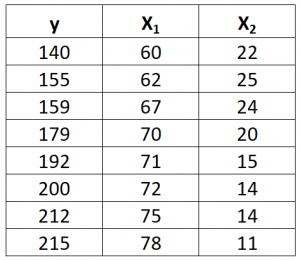


image.png



- y = the predicted value of the dependent variable
- B_0 = the y-intercept (value of y when all other parameters are set to 0)
- B_1X_1 = the regression coefficient (B_1) of the first independent variable
- (X_1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)
- … = do the same for however many independent variables you are testing
-  B_nX_n = the regression coefficient of the last independent variable
\epsilon = model error (a.k.a. how much variation there is in our estimate of y)



Step 1: Calculate X12, X22, X1y, X2y and X1X2.

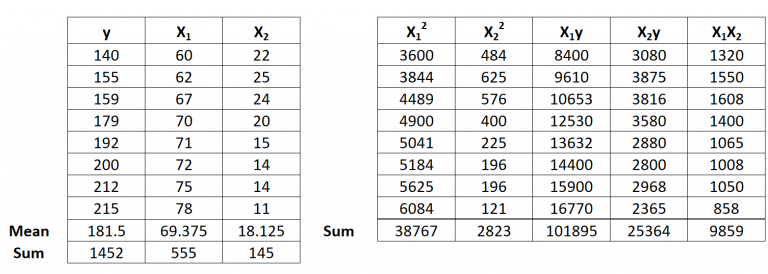

Step 2: Calculate Regression Sums

Σx12 = ΣX12 – (ΣX1)2 / n = 38,767 – (555)2 / 8 = 263.875
Σx22 = ΣX22 – (ΣX2)2 / n = 2,823 – (145)2 / 8 = 194.875
Σx1y = ΣX1y – (ΣX1Σy) / n = 101,895 – (555*1,452) / 8 = 1,162.5
Σx2y = ΣX2y – (ΣX2Σy) / n = 25,364 – (145*1,452) / 8 = -953.5
Σx1x2 = ΣX1X2 – (ΣX1ΣX2) / n = 9,859 – (555*145) / 8 = -200.375

In [ ]:
Step 3: Calculate b0, b1, and b2.

The formula to calculate b1 is: [(Σx22)(Σx1y)  – (Σx1x2)(Σx2y)]  / [(Σx12) (Σx22) – (Σx1x2)2]

Thus, b1 = [(194.875)(1162.5)  – (-200.375)(-953.5)]  / [(263.875) (194.875) – (-200.375)2] = 3.148

The formula to calculate b2 is: [(Σx12)(Σx2y)  – (Σx1x2)(Σx1y)]  / [(Σx12) (Σx22) – (Σx1x2)2]

Thus, b2 = [(263.875)(-953.5)  – (-200.375)(1152.5)]  / [(263.875) (194.875) – (-200.375)2] = -1.656

In [ ]:
# Steps:
1. Data collect - Load
2. EDA (Exploartory data Analysis)
    2.1 Data clearning
    2.2 Missing value
    2.3 duplicate values
    2.4 outlier
    2.5.Feature engineering  / scaling
    2.5 data normalization
3. Feature Selection (input / output)
4. Split data into training/testing
5. ML algorithm selection
6. Create ML Model
7. Ask ML model Learn the training data
8. Predict ML Model output using Testing data
9. Evaluate the Model performance
10. Deployement

In [1]:
# load data

import pandas as pd

df = pd.read_csv('/content/co2.csv')

df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [2]:
df = df.drop(['Unnamed: 5'], axis = 1)

df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
df.shape

(36, 5)

In [5]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [8]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn-whitegrid')

plt.rcParams['figure.figsize'] = (14,10)

<ipython-input-11-2bae9bac539a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


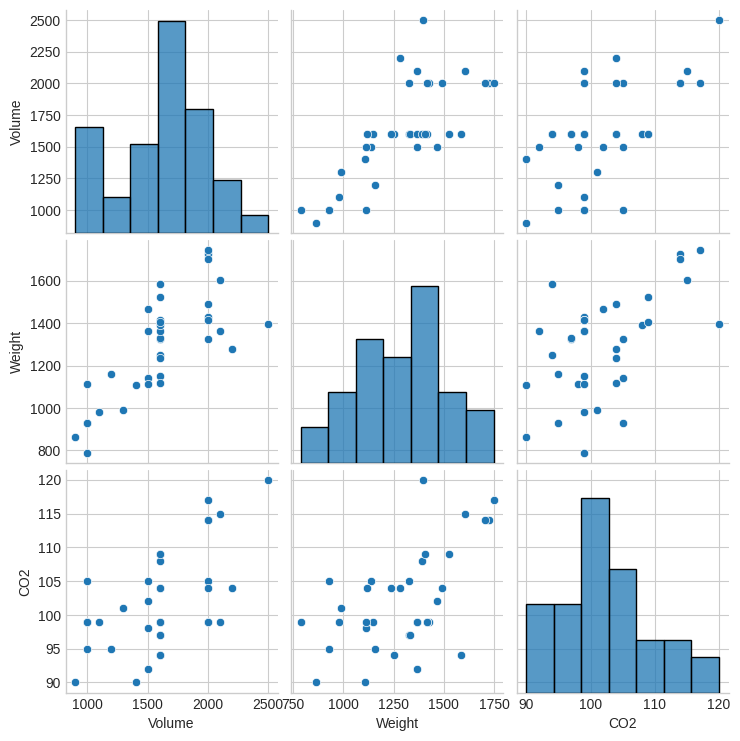

In [13]:
sns.pairplot(df)
plt.savefig('pariplot1.png')
plt.show()

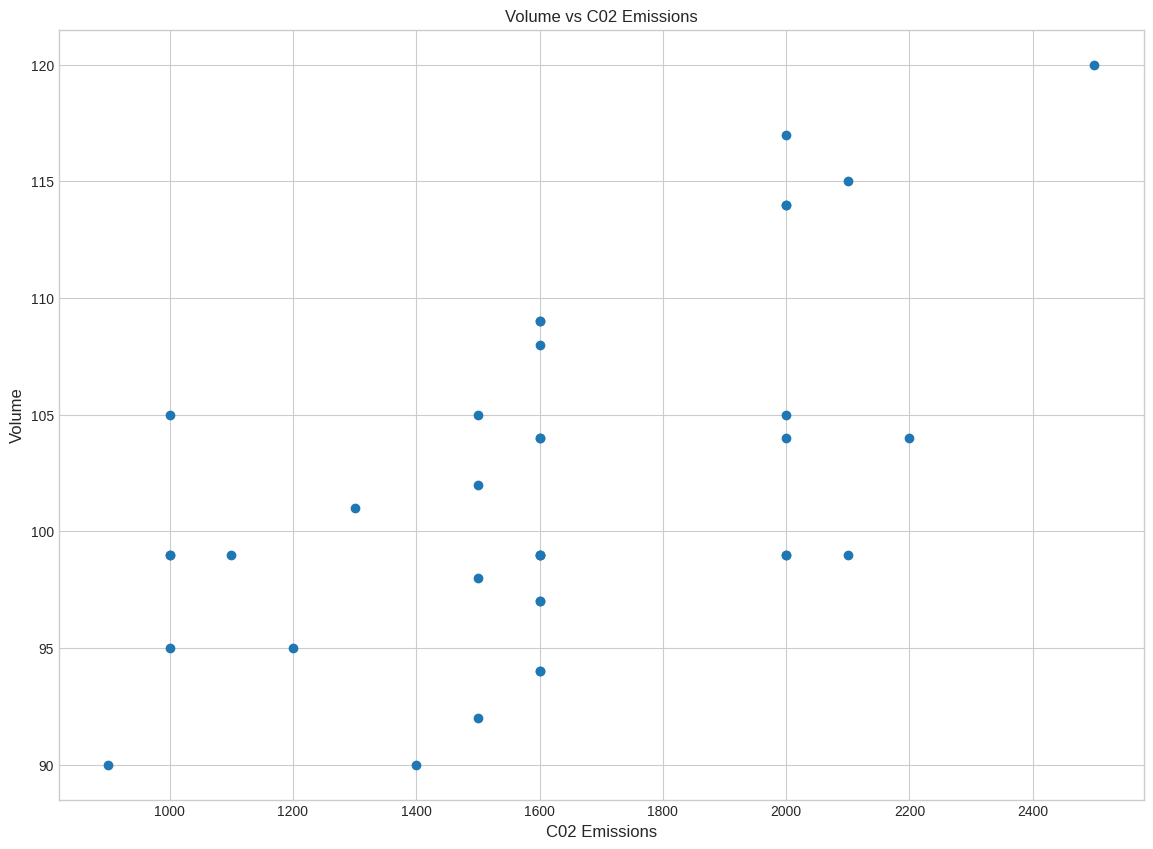

In [14]:
# Volume - Co2

plt.scatter(x= 'Volume', y = 'CO2', data = df)

plt.title('Volume vs C02 Emissions')
plt.xlabel('C02 Emissions', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.savefig('Volume vs C02 Emissions.png')
plt.show()

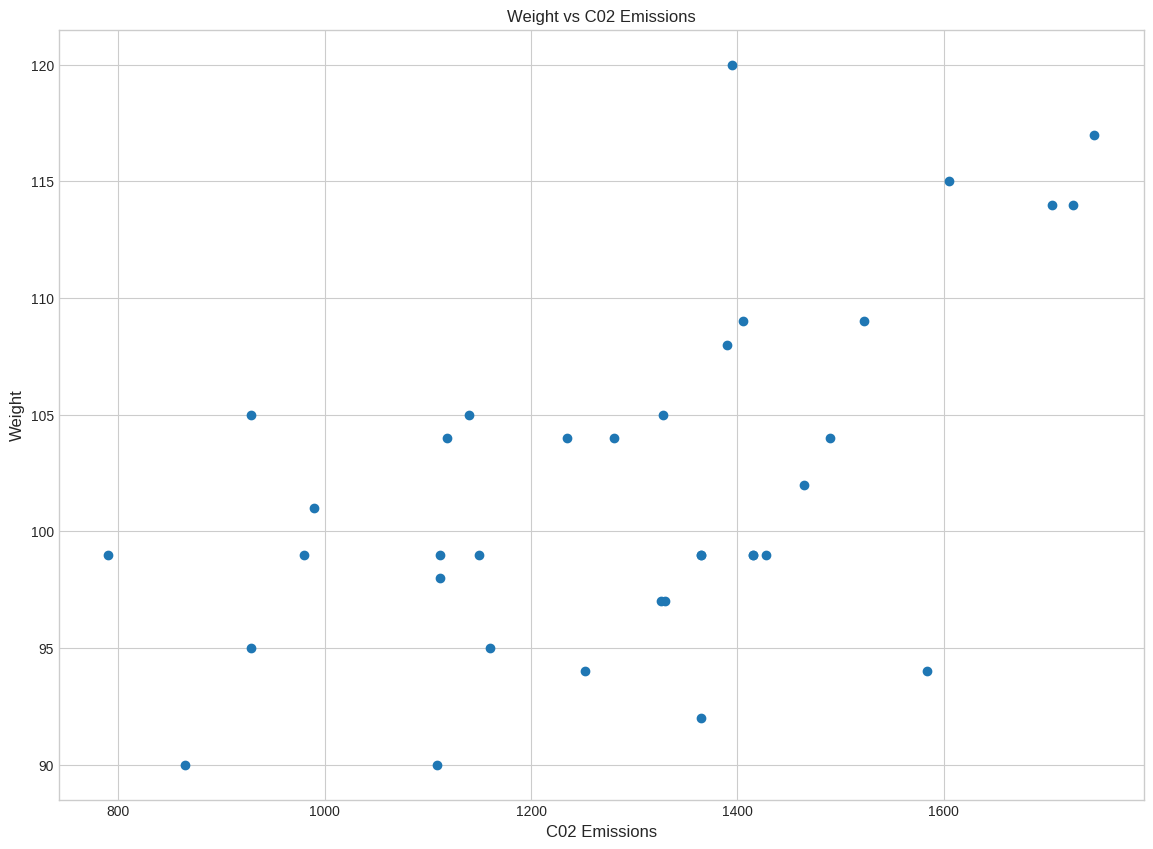

In [15]:
# weight vs CO2 emissioins

# Volume - Co2

plt.scatter(x= 'Weight', y = 'CO2', data = df)

plt.title('Weight vs C02 Emissions')
plt.xlabel('C02 Emissions', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.savefig('Weight vs C02 Emissions.png')
plt.show()

In [16]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [17]:
df = df.drop(['Model'], axis=1)
df.head()

,Car,Volume,Weight,CO2
0,Toyota,1000,790,99
1,Mitsubishi,1200,1160,95
2,Skoda,1000,929,95
3,Fiat,900,865,90
4,Mini,1500,1140,105


In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [19]:
df['Car'].unique()

array(['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Hundai', 'Opel',
       'BMW', 'Mazda', 'Volvo'], dtype=object)

In [22]:
df['CO2'].unique()

array([ 99,  95,  90, 105,  92,  98, 101,  94,  97, 104, 102, 114, 109,
       115, 117, 108, 120])

In [24]:
df.Car = le.fit_transform(df.Car)
df.head()

,Car,Volume,Weight,CO2
0,14,1000,790,99
1,10,1200,1160,95
2,12,1000,929,95
3,2,900,865,90
4,9,1500,1140,105


In [26]:
# input & output data
x = df[['Car','Volume','Weight']]
# x1 = car , x2 = volume, x2 = weight

y = df.CO2

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=12)


In [29]:
# select alg.  input 3 var, 1 output -> based on the output -> numerical continues data - Regression problem. -> MLR

from sklearn.linear_model import LinearRegression

#create ML - MODEL
mlr_model = LinearRegression()

#train the mlr_model
mlr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
X_test

,Car,Volume,Weight
21,11,2000,1428
25,8,1500,1465
24,16,2000,1415
26,0,2000,1490
18,12,1600,1119
14,5,1600,1326
33,1,1600,1390
15,11,1600,1330


In [30]:
# predict the output through testing data

y_pred =  mlr_model.predict(X_test)

print(y_pred)

[109.1355129  103.21089496 110.98196703 105.32925863 103.12445017
 101.98619239 100.9197669  104.35213253]


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

47.41770077970258
5.618967669821618
